In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**IMPORTING DATA FROM DRIVE**

In [ ]:
# Importing data form the source directory in google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_dir = '/content/drive/MyDrive/RBS/Academic/SEM 1/Analysis of Fixed Income/FIXED INCOME NEW/MISC/ExtraCredit/'
data_file = 'Extra_Credit_Assignment_Data.xlsx'

Mounted at /content/drive


**DATA PREPROCESSING**

In [ ]:
xls = pd.ExcelFile(data_dir+data_file)

sigmas = pd.read_excel(xls, sheet_name='Sigmas', header=None, names=['Sigmas'])
new_row = pd.DataFrame({ 'Sigmas': [pd.NA] })
sigmas = pd.concat([new_row, sigmas], ignore_index=True)
sigmas = sigmas.head(30)

disc_facs = pd.read_excel(xls, sheet_name='D(T)', header=None, names=['D(T)'])

time_intervals = pd.DataFrame({'Time': [i * 0.5 for i in range(1, 31)]})

data = pd.concat([time_intervals, sigmas, disc_facs], axis=1)

In [ ]:
data

,Time,Sigmas,D(T)
0,0.5,NaN,0.972476
1,1.0,0.100,0.944569
2,1.5,0.120,0.916324
3,2.0,0.135,0.887934
4,2.5,0.150,0.859741
5,3.0,0.160,0.832044
6,3.5,0.162,0.805077
7,4.0,0.164,0.778904
8,4.5,0.162,0.753480
9,5.0,0.160,0.728734


**IMPLEMENTING THE BDT MODEL**

In [ ]:
discount_factors = data['D(T)']
volatilities = data['Sigmas']
times = np.arange(0.5, 15.5, 0.5)

In [ ]:
# Initial short rate
r_0_5 = -np.log(discount_factors[0]) / times[0]
rates = [r_0_5]

In [ ]:
# Function to calculate the rate at the current node
def calculate_rate(previous_rate, sigma, D, T):
    # For the first vol value of NaN, the rate remains the same
    if np.isnan(sigma):
        return previous_rate

    def f(r):
        # Up and down rates
        r_u = previous_rate * np.exp(sigma * np.sqrt(T))
        r_d = previous_rate * np.exp(-sigma * np.sqrt(T))
        r_f = (r_u + r_d) / 2
        # Bond PV, discounted at the current rate
        bond_price = np.exp(-r * T)
        return bond_price - D

    rate = sp.optimize.fsolve(f, previous_rate)[0]
    return rate

In [ ]:
# Loop to compute each subsequent rate and add to original dataframe
for i in range(1, len(times)):
    T = times[i]
    sigma = volatilities[i-1]
    D = discount_factors[i]
    new_rate = calculate_rate(rates[-1], sigma, D, T)
    rates.append(new_rate)

data['Rates'] = rates

In [ ]:
data

,Time,Sigmas,D(T),Rates
0,0.5,NaN,0.972476,0.055819
1,1.0,0.100,0.944569,0.055819
2,1.5,0.120,0.916324,0.058257
3,2.0,0.135,0.887934,0.059429
4,2.5,0.150,0.859741,0.060450
5,3.0,0.160,0.832044,0.061290
6,3.5,0.162,0.805077,0.061948
7,4.0,0.164,0.778904,0.062467
8,4.5,0.162,0.753480,0.062901
9,5.0,0.160,0.728734,0.063289


In [ ]:
for T, rate in zip(times, rates):
    print(f"For Time: {T} years, Rate: {rate:.4%}")

For Time: 0.5 years, Rate: 5.5819%
For Time: 1.0 years, Rate: 5.5819%
For Time: 1.5 years, Rate: 5.8257%
For Time: 2.0 years, Rate: 5.9429%
For Time: 2.5 years, Rate: 6.0450%
For Time: 3.0 years, Rate: 6.1290%
For Time: 3.5 years, Rate: 6.1948%
For Time: 4.0 years, Rate: 6.2467%
For Time: 4.5 years, Rate: 6.2901%
For Time: 5.0 years, Rate: 6.3289%
For Time: 5.5 years, Rate: 6.3664%
For Time: 6.0 years, Rate: 6.4030%
For Time: 6.5 years, Rate: 6.4382%
For Time: 7.0 years, Rate: 6.4720%
For Time: 7.5 years, Rate: 6.5040%
For Time: 8.0 years, Rate: 6.5340%
For Time: 8.5 years, Rate: 6.5620%
For Time: 9.0 years, Rate: 6.5880%
For Time: 9.5 years, Rate: 6.6117%
For Time: 10.0 years, Rate: 6.6330%
For Time: 10.5 years, Rate: 6.6520%
For Time: 11.0 years, Rate: 6.6687%
For Time: 11.5 years, Rate: 6.6834%
For Time: 12.0 years, Rate: 6.6964%
For Time: 12.5 years, Rate: 6.7078%
For Time: 13.0 years, Rate: 6.7179%
For Time: 13.5 years, Rate: 6.7271%
For Time: 14.0 years, Rate: 6.7355%
For Time: 1

**FORWARD RATES**

In [ ]:
forward_rates = []

for i in range(1, len(discount_factors)):
    # ‘m’ year loan that starts at time ‘n’ years from now
    n = times[i - 1]
    m = times[i] - times[i - 1]
    # Discount factors for the time intervals
    D_n = discount_factors[i - 1]
    D_nm = discount_factors[i]

    forward_rate = (D_n / D_nm - 1) / m
    forward_rates.append(forward_rate)

print('Forward Rates:')
for i, rate in enumerate(forward_rates, 1):
    print(f"f({times[i-1]}, {times[i]-times[i-1]}): {rate:.4%}")

Forward Rates:
f(0.5, 0.5): 5.9090%
f(1.0, 0.5): 6.1650%
f(1.5, 0.5): 6.3946%
f(2.0, 0.5): 6.5585%
f(2.5, 0.5): 6.6575%
f(3.0, 0.5): 6.6992%
f(3.5, 0.5): 6.7204%
f(4.0, 0.5): 6.7484%
f(4.5, 0.5): 6.7916%
f(5.0, 0.5): 6.8563%
f(5.5, 0.5): 6.9219%
f(6.0, 0.5): 6.9808%
f(6.5, 0.5): 7.0316%
f(7.0, 0.5): 7.0737%
f(7.5, 0.5): 7.1082%
f(8.0, 0.5): 7.1348%
f(8.5, 0.5): 7.1534%
f(9.0, 0.5): 7.1634%
f(9.5, 0.5): 7.1641%
f(10.0, 0.5): 7.1563%
f(10.5, 0.5): 7.1446%
f(11.0, 0.5): 7.1314%
f(11.5, 0.5): 7.1177%
f(12.0, 0.5): 7.1050%
f(12.5, 0.5): 7.0945%
f(13.0, 0.5): 7.0877%
f(13.5, 0.5): 7.0865%
f(14.0, 0.5): 7.0923%
f(14.5, 0.5): 7.1070%


**COMPARISON GRAPH**

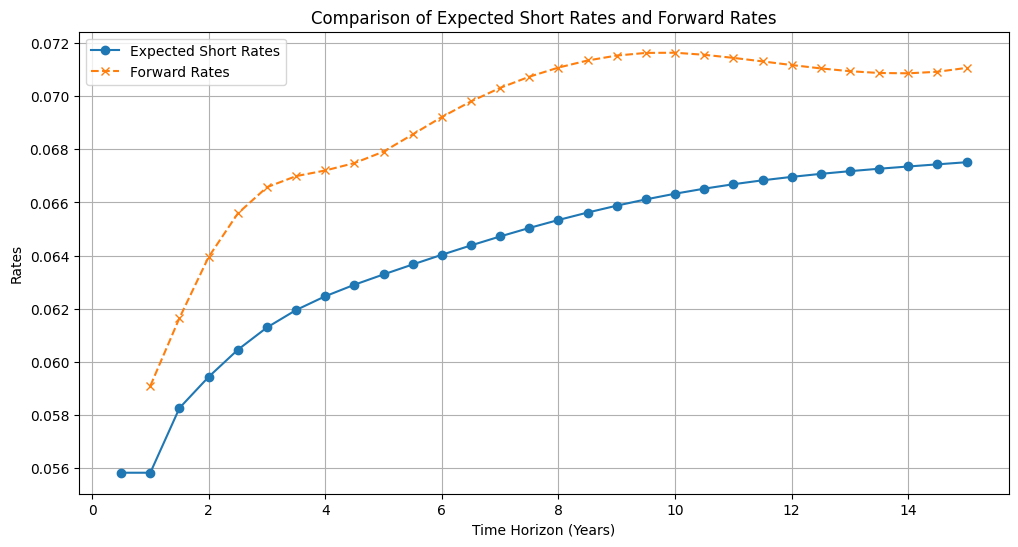

In [ ]:
times = np.arange(0.5, 15.5, 0.5)
rates = data['Rates']
forward_rates_full = [np.nan] + forward_rates

plt.figure(figsize=(12, 6))
plt.plot(times, rates, marker='o', label='Expected Short Rates')
plt.plot(times, forward_rates_full, marker='x', label='Forward Rates', linestyle='--')
plt.title('Comparison of Expected Short Rates and Forward Rates')
plt.xlabel('Time Horizon (Years)')
plt.ylabel('Rates')
plt.legend()
plt.grid(True)
plt.show()